#### Importing packages

In [98]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import plotly as py
import plotly.express as px
import missingno as msno
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler

#### Functions

In [99]:
# Function to remove missing values above a given threshold
def missing_remove(dataframe, threshold):
    columns = dataframe.columns[(dataframe.isna().sum()/dataframe.shape[1])>threshold].tolist()
    print(f"# Features deleted with more than {threshold} % missing values", len(columns))
    return dataframe.drop(columns, axis=1,inplace=True)

In [100]:
# Function to remove features with unique values
def unique_remove(dataframe):
    unique_features = []
    for col in dataframe.columns:
        if(dataframe[col].unique().size == 2):
            if(len(unique_features) == 0):
                unique_features =  dataframe[col]
            else:
                 unique_features = pd.concat([unique_features, dataframe[col]], axis=1)
            dataframe.drop(col, axis=1, inplace=True)

In [101]:
# Function to remove outlier
def outlier_detection_zcore(dataframe):
    data_mean, data_std  = dataframe.mean(), dataframe.std()
    data_z_scores = ((dataframe - data_mean) / data_std).abs()
    m = data_z_scores > 3
    dataframe = dataframe.mask(m,inplace=True)
    return dataframe

#### Importing and basic cleaning

In [102]:
# Importing data from internet in runtime
data_url="https://archive.ics.uci.edu/ml/machine-learning-databases/secom/secom.data"

In [103]:
# Assigning data to a pandas dataframe
secom_data = pd.read_csv(data_url,sep=' ',header=None)

In [104]:
# Renaming the columns 
secom_data.columns = ["Feature_"+str(column+1) for column in range(len(secom_data.columns))]
secom_data.head()

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,...,Feature_581,Feature_582,Feature_583,Feature_584,Feature_585,Feature_586,Feature_587,Feature_588,Feature_589,Feature_590
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,...,NaN,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,...,0.0060,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,...,0.0148,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,...,0.0044,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,...,NaN,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432


In [105]:
# Importing target data from internet in runtime
label_url="https://archive.ics.uci.edu/ml/machine-learning-databases/secom/secom_labels.data"

In [106]:
# Assigning target data to a pandas dataframe
secom_labels = pd.read_csv(label_url, sep = " ",header=None)

In [107]:
# Renaming the columns 
secom_labels.columns = ["Classification","Timestamp"]

In [108]:
# Changing datatype for consitency
secom_labels['Timestamp'] = pd.to_datetime(secom_labels['Timestamp'],errors='raise')

In [109]:
# Merging the data
data= pd.concat([secom_labels,secom_data],axis=1)

In [110]:
# Dropping the timestamp column as it provides no insights
data.drop(columns="Timestamp", errors='raise',inplace=True)

In [111]:
target = data[['Classification']]
data.drop(['Classification'], axis=1,inplace=True)

#### Spliting the data into training set and test set

In [112]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data,target, test_size=0.25, random_state=42, stratify=target)
# We use the startify parameter as the data is imbalanced on the basis of pass and fail and this will ensure the same 
#is retained when we split - Random state will help us create a reproducible data - Test size is the split ration

In [113]:
X_test_original = X_test

#### Re-labeling the Target values


In [114]:
# # Relabeling target variables 1 is pass and 0 is fail
# y_train = y_train.replace(to_replace=[-1, 1], value=[1, 0])
# y_test = y_test.replace(to_replace=[-1, 1], value=[1, 0])

In [115]:
# # Scaling the data
# scaler = StandardScaler()
# scaler.fit(X_train)
# X_train = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
# X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

#### Removing columns with more that 50% missing values

In [116]:
X_train.shape

(1175, 590)

In [117]:
X_train_missing = X_train
missing_remove(X_train_missing, 0.5)
X_train_missing.head()

# Features deleted with more than 0.5 % missing values 32


,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,...,Feature_577,Feature_578,Feature_583,Feature_584,Feature_585,Feature_586,Feature_587,Feature_588,Feature_589,Feature_590
160,3057.03,2468.41,2184.8778,960.8486,1.0160,100.0,102.5333,0.1214,1.4549,-0.0125,...,1.0653,15.0191,0.5067,0.0126,0.0034,2.4798,0.0195,0.0121,0.0048,62.1248
814,3012.09,2551.08,2216.7333,1748.0885,1.1127,100.0,97.5822,0.1242,1.5136,-0.0090,...,2.4530,12.7241,0.4994,0.0073,0.0020,1.4634,0.0111,0.0069,0.0021,62.3602
124,3032.81,2534.74,2239.4223,1997.3782,1.5397,100.0,98.3356,0.1229,1.4974,-0.0046,...,1.5902,18.6118,0.4950,0.0149,0.0041,3.0137,0.0241,0.0086,0.0027,35.5550
501,2987.72,2550.52,2180.7000,1159.3838,1.0177,100.0,98.9367,0.1222,1.4207,0.0016,...,1.5141,11.3379,0.5042,0.0099,0.0030,1.9562,0.0048,0.0226,0.0079,474.0812
1362,3001.90,2465.51,2223.0444,1194.5986,1.2016,100.0,112.5811,0.1229,1.4201,-0.0182,...,83.9190,67.3679,0.5026,0.0085,0.0026,1.6862,0.0182,0.0077,0.0025,42.5048


#### Removing Columns with non unique values

In [118]:
X_train_unique = X_train_missing
unique_remove(X_train_unique)
X_train_unique.shape

(1175, 442)

### Removing outliers and using knn

In [119]:
X_train_missing.isnull().sum().sum()

6038

In [120]:
outlier_detection_zcore(X_train_missing)
X_train_missing.isnull().sum().sum()

10506

In [121]:
# From test set deleting columns that are removed in training set
X_test_missing = X_test[np.array(X_train_missing.columns)]


In [122]:
#X_test.isnull().sum().sum()

In [123]:
outlier_detection_zcore(X_test_missing)
X_test_missing.isnull().sum().sum()

3662

from sklearn.impute import KNNImputer
knn = KNNImputer()
knn.fit(X_train_unique)
X_train_knn=pd.DataFrame(knn.transform(X_train_unique), columns=X_train_unique.columns)
X_train_knn.isna().sum().sum()

In [124]:
from sklearn.impute import KNNImputer
knn = KNNImputer()
knn.fit(X_train_missing)
X_train_knn=pd.DataFrame(knn.transform(X_train_missing), columns=X_train_missing.columns)
X_train_knn.isna().sum().sum()

0

In [125]:
from sklearn.impute import KNNImputer
knn = KNNImputer()
knn.fit(X_test_missing)
X_test_knn=pd.DataFrame(knn.transform(X_test_missing), columns=X_test_missing.columns)
X_test_knn.isna().sum().sum()

0

In [126]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import plotly as py
import plotly.express as px
import missingno as msno
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import accuracy_score
# to avoid warnings
import warnings
warnings.filterwarnings('ignore')
warnings.warn("this will not show")

In [127]:
def rfc(X_train_rfc,X_test_rfc,y_train,max_depth):
  from matplotlib.pyplot import figure
  figure(figsize=(8, 5), dpi=80)
  model = RandomForestClassifier(n_estimators=100, criterion='entropy', max_depth=max_depth)
  model.fit(X_train_rfc, y_train)
  y_pred = model.predict(X_test_rfc)
  sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d",yticklabels = ['Act. Pass', 'Act. Fail'], xticklabels = ['Pred. Pass' , 'Pred. Fail'])
  print(classification_report(y_test, y_pred))
  print("Test Accuracy Score", accuracy_score(y_test, y_pred))
  print("Train Accuracy Score", accuracy_score(y_train, model.predict(X_train_rfc)))
  print("F1 Score",f1_score(y_test, y_pred, average='micro'))
  print("MC Score",matthews_corrcoef(y_test, y_pred))
#   #create ROC curve
#   plt.plot(fpr,tpr,label='Random Forest Classifier (AUC = %0.2f)' % auc)
#   plt.ylabel('True Positive Rate')
#   plt.xlabel('False Positive Rate')
#   plt.plot([0, 1], [0, 1],'r--')
#   plt.xlim([-0.01, 1.0])
#   plt.ylim([0.0, 1.05])
#   plt.title('Receiver Operating Characteristic')
#   plt.legend(loc="lower right")

              precision    recall  f1-score   support

          -1       0.93      1.00      0.97       366
           1       0.00      0.00      0.00        26

    accuracy                           0.93       392
   macro avg       0.47      0.50      0.48       392
weighted avg       0.87      0.93      0.90       392

Test Accuracy Score 0.9336734693877551
Train Accuracy Score 0.9336170212765957
F1 Score 0.9336734693877551
MC Score 0.0


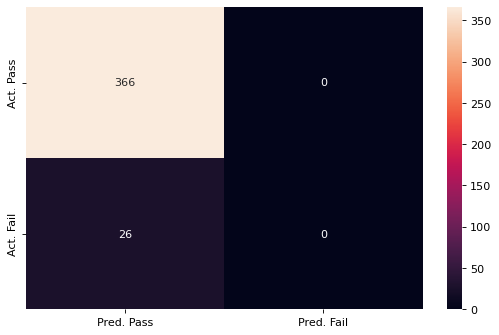

In [129]:
from sklearn.metrics import f1_score, matthews_corrcoef

rfc(X_train_knn,X_test_knn,y_train,4)

In [130]:
#importing the necessary libraries
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression
# Sequential Forward Selection(sfs)
sfs = SFS(LinearRegression(),k_features=15,forward=True,verbose=True,scoring='neg_mean_squared_error')

In [131]:
sfs.fit(X_train_knn, y_train)
sfs_list = list(sfs.k_feature_names_)
print(sfs_list)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 442 out of 442 | elapsed:    4.9s finished
Features: 1/15[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 441 out of 441 | elapsed:    6.1s finished
Features: 2/15[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 440 out of 440 | elapsed:    6.2s finished
Features: 3/15[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 439 out of 439 | elapsed:    6.5s finished
Features: 4/15[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 438 out of 438 | elapsed:    6.7s finished
Features: 5/15[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 437 out of 437 | elapsed:    7.3s finished
Features: 6/15[Parallel(

['Feature_26', 'Feature_34', 'Feature_60', 'Feature_66', 'Feature_87', 'Feature_104', 'Feature_114', 'Feature_122', 'Feature_126', 'Feature_178', 'Feature_205', 'Feature_337', 'Feature_456', 'Feature_478', 'Feature_574']


In [132]:
# creating a new dataframe using the above variables and adding the target variable
X_train_sfs = X_train_knn[sfs_list]

In [133]:
# From test set deleting columns that are removed in training set
X_test_sfs = X_test_knn[np.array(X_train_sfs.columns)]
X_test_sfs.shape

(392, 15)

              precision    recall  f1-score   support

          -1       0.93      1.00      0.97       366
           1       0.00      0.00      0.00        26

    accuracy                           0.93       392
   macro avg       0.47      0.50      0.48       392
weighted avg       0.87      0.93      0.90       392

Test Accuracy Score 0.9336734693877551
Train Accuracy Score 0.9429787234042554
F1 Score 0.9336734693877551
MC Score 0.0


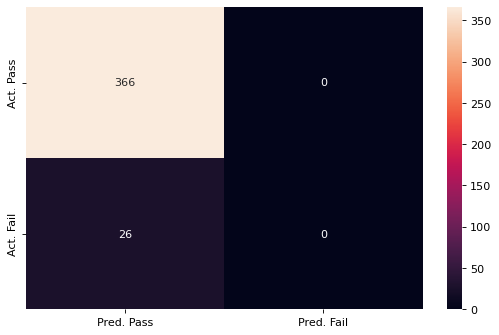

In [134]:
rfc(X_train_sfs,X_test_sfs,y_train,6)

In [135]:
import numpy as np
from imblearn.over_sampling import SMOTE, ADASYN, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.decomposition import PCA

In [136]:
from imblearn.combine import SMOTETomek 
# Sampling technique

def Sampling(X_train, y_train, sampler):

    #SMOTE
    if sampler == 'SMOTE':
        sampler = SMOTE(random_state=100)    
    

    #SMOTTEENN
    if sampler == 'SMOTEENN' :
        sampler = SMOTEENN(random_state=100)
        
    # SMOTETOMEK
    
    if sampler == 'SMOTETOMEK' :
        sampler = SMOTETomek(random_state=100)

    #ADASYN
    if sampler == 'ADASYN':
        sampler = ADASYN(random_state=100)
        
    #ROSE
    if sampler == 'ROSE':
        sampler = RandomOverSampler(random_state=100, shrinkage=1)
        

    X_resampled, y_resampled = sampler.fit_resample(X_train, y_train)
    counter = Counter(y_resampled)
    print(counter)
    return X_resampled, y_resampled

In [137]:
# Imbalance treatment
from collections import Counter
X_smote, y_smote = Sampling(X_train_sfs, y_train,'SMOTE')

Counter({'Classification': 1})


              precision    recall  f1-score   support

          -1       0.95      0.88      0.92       366
           1       0.17      0.35      0.23        26

    accuracy                           0.85       392
   macro avg       0.56      0.61      0.57       392
weighted avg       0.90      0.85      0.87       392

Test Accuracy Score 0.8469387755102041
Train Accuracy Score 0.9480401093892434
F1 Score 0.8469387755102041
MC Score 0.16776082144842425


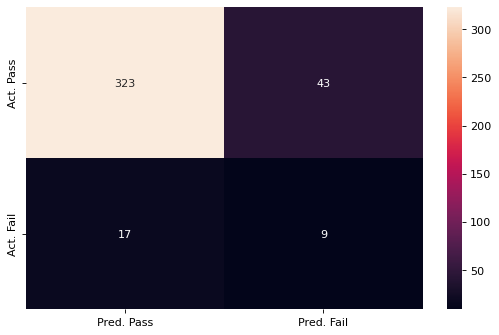

In [138]:
rfc(X_smote,X_test_sfs,y_smote,6)

In [139]:
# Imbalance treatment
from imblearn.combine import SMOTEENN
X_smoteenn, y_smoteenn = Sampling(X_train_sfs, y_train,'SMOTEENN')

Counter({'Classification': 1})


              precision    recall  f1-score   support

          -1       0.96      0.77      0.86       366
           1       0.14      0.54      0.23        26

    accuracy                           0.76       392
   macro avg       0.55      0.66      0.54       392
weighted avg       0.91      0.76      0.81       392

Test Accuracy Score 0.7576530612244898
Train Accuracy Score 0.9564958283671037
F1 Score 0.7576530612244898
MC Score 0.1797409591521339


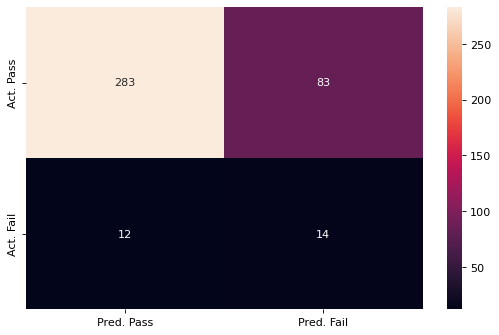

In [140]:
rfc(X_smoteenn,X_test_sfs,y_smoteenn,6)

In [141]:
# Imbalance treatment
X_smotetomek, y_smotetomek = Sampling(X_train_sfs, y_train,'SMOTETOMEK')

Counter({'Classification': 1})


              precision    recall  f1-score   support

          -1       0.94      0.88      0.91       366
           1       0.12      0.23      0.16        26

    accuracy                           0.83       392
   macro avg       0.53      0.55      0.53       392
weighted avg       0.89      0.83      0.86       392

Test Accuracy Score 0.8341836734693877
Train Accuracy Score 0.95
F1 Score 0.8341836734693878
MC Score 0.07975499029964678


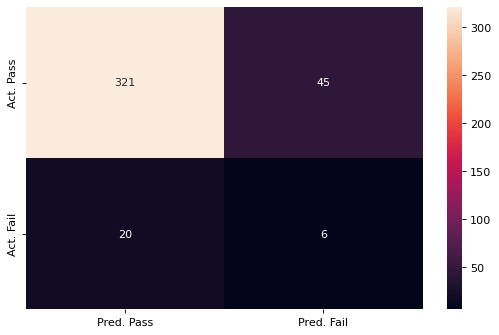

In [142]:
rfc(X_smotetomek,X_test_sfs,y_smotetomek,6)

In [143]:
# Imbalance treatment
X_adasyn, y_adasyn = Sampling(X_train_sfs, y_train,'ADASYN')

Counter({'Classification': 1})


              precision    recall  f1-score   support

          -1       0.95      0.87      0.91       366
           1       0.16      0.35      0.21        26

    accuracy                           0.83       392
   macro avg       0.55      0.61      0.56       392
weighted avg       0.90      0.83      0.86       392

Test Accuracy Score 0.8316326530612245
Train Accuracy Score 0.9468822170900693
F1 Score 0.8316326530612244
MC Score 0.14877738553304085


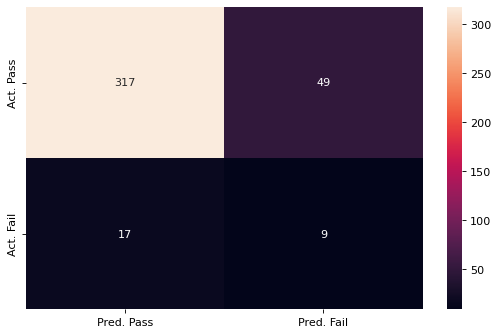

In [144]:
rfc(X_adasyn,X_test_sfs,y_adasyn,6)

In [145]:
# Imbalance treatment
X_rose, y_rose = Sampling(X_train_sfs, y_train,'ROSE')

Counter({'Classification': 1})


              precision    recall  f1-score   support

          -1       0.95      0.86      0.90       366
           1       0.15      0.35      0.21        26

    accuracy                           0.83       392
   macro avg       0.55      0.60      0.56       392
weighted avg       0.90      0.83      0.86       392

Test Accuracy Score 0.8290816326530612
Train Accuracy Score 0.8855970829535096
F1 Score 0.8290816326530612
MC Score 0.1458309868530234


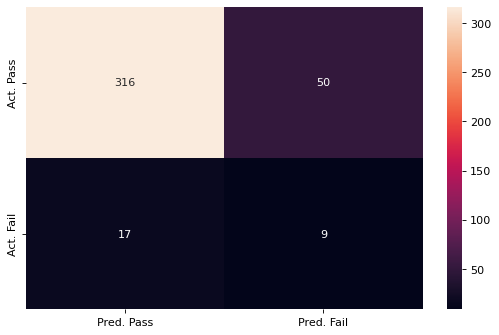

In [146]:
rfc(X_rose,X_test_sfs,y_rose,6)

<AxesSubplot:>

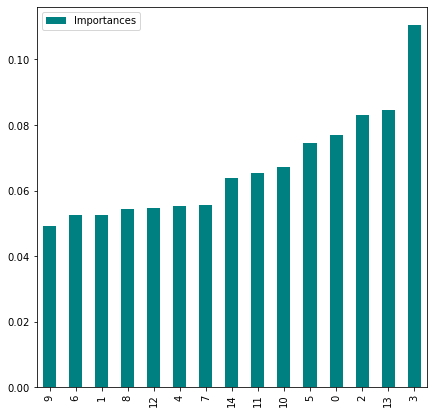

In [147]:
model = RandomForestClassifier()
model.fit(X_train_sfs, y_train.values.ravel())
    
feature_selector = RandomForestClassifier(n_jobs=-1, class_weight='balanced_subsample', max_depth=5, random_state=100)
    
importances = model.feature_importances_
final_df = pd.DataFrame({"Features": pd.DataFrame(X_train_sfs).columns, "Importances": importances})
final_df.set_index('Importances')
final_df = final_df.sort_values('Importances')
final_df.plot.bar(color = 'teal',figsize=(7,7))

Text(0.5, 0, 'Random Forest Feature Importance')

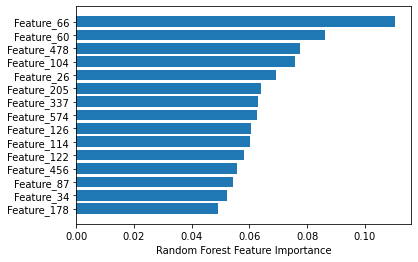

In [148]:
model = RandomForestClassifier()
model.fit(X_train_sfs, y_train.values.ravel())
feature_selector = RandomForestClassifier(n_jobs=-1, class_weight='balanced_subsample', max_depth=5, random_state=100)
#figure(figsize=(6, 6), dpi=80)
sorted_idx = model.feature_importances_.argsort()
plt.barh(X_train_sfs.columns[sorted_idx], model.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")